In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split

In [79]:
def OutlierDetector(data):
    '''Detects outliers in a given pandas Series using the IQR method.
    Args:
        data (pd.Series): The input data series to check for outliers.
    Returns:
        pd.Series: A series containing the outliers.
    Raises:
        ValueError: If the input data is not a pandas Series.   
    
    '''
    
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return data[(data < lower) | (data > upper)]


In [80]:
def DefaultFlagGenerator(df):
    """Generates a default flag based on multiple financial stress indicators.
    Args:
        df (pd.DataFrame): DataFrame containing financial indicators.
            Must include the following columns:
            - 'payment_delinquency_count'
            - 'over_indebtedness_flag'
            - 'financial_stress_score'
            - 'bnpl_debt_ratio'
            - 'credit_limit_utilisation'
    Returns:
        pd.DataFrame: The original DataFrame with an additional column 'default_flag'.
            This column is 1 if the customer is likely to default, 0 otherwise.
    """
    default_flag = (
        (df['payment_delinquency_count'] >= 3).astype(int) +
        (df['over_indebtedness_flag'] == 1).astype(int) +
        (df['financial_stress_score'] >= 9).astype(int) +
        (df['bnpl_debt_ratio'] >= 1.8).astype(int) +
        (df['credit_limit_utilisation'] >= 95).astype(int)
        ) >= 3 # Must meet at least 3 of the 5 conditions
    df['default_flag'] = default_flag.astype(int)
    return df

In [81]:
def binary_col(data):
    """Identifies binary columns in a DataFrame.
    Args:
        data (pd.DataFrame): The input DataFrame to check for binary columns.
        Returns:
        list: A list of column names that are binary (i.e., have exactly two unique values).
        Raises:
            ValueError: If the input data is not a pandas DataFrame.


    """
    binary_cols=[col for col in data.columns if data[col].nunique() == 2]
    return binary_cols

In [82]:
def continuous_col(data):
    """ Identifies continuous columns in a DataFrame.
    Args:
        data (pd.DataFrame): The input DataFrame to check for continuous columns.
    Returns:
        list: A list of column names that are continuous (i.e., have more than two unique values).
    Raises:
        ValueError: If the input data is not a pandas DataFrame.
    """
    continuous_cols=[col for col in data.columns if data[col].nunique() > 2]
    return continuous_cols
    

In [83]:
def Scaler(data):

    """Scales continuous columns in a DataFrame using StandardScaler.
    Args:
        data (pd.DataFrame): The input DataFrame to scale.
    Returns:
        pd.DataFrame: A DataFrame with binary columns unchanged and continuous columns scaled.
    Raises:
        ValueError: If the input data is not a pandas DataFrame.
    """

    binary_cols = binary_col(data)
    continuous_cols = continuous_col(data)
    scaler = StandardScaler()
   # Scale the continuous columns
    scaled_continuous = scaler.fit_transform(data[continuous_cols])
    scaled_continuous_df = pd.DataFrame(scaled_continuous, columns=continuous_cols)
    # Combine the scaled continuous columns with the binary columns
    result = pd.concat([data[binary_cols].reset_index(drop=True), scaled_continuous_df.reset_index(drop=True)], axis=1)
    return result

In [84]:
def read_csv(file_path: str) -> pd.DataFrame:
    """
    Loads a CSV from the given path and prints its .info().
    Returns the loaded DataFrame.
    """
    df = pd.read_csv(file_path)
    df.info()
    return df

In [85]:
#path = input("Enter the path to your CSV file: ")
#data = read_csv(path)

In [86]:
data=pd.read_csv('BNPL.csv')
data = data.select_dtypes(include=['number'])

In [87]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    outliers = OutlierDetector(data[column])
    print(f"Outliers in {column}:\n", outliers)


Outliers in failed_traditional_credit:
 Series([], Name: failed_traditional_credit, dtype: int64)
Outliers in bnpl_usage_frequency:
 Series([], Name: bnpl_usage_frequency, dtype: int64)
Outliers in over_indebtedness_flag:
 Series([], Name: over_indebtedness_flag, dtype: int64)
Outliers in financial_stress_score:
 Series([], Name: financial_stress_score, dtype: int64)
Outliers in external_repayment_loans:
 Series([], Name: external_repayment_loans, dtype: int64)
Outliers in credit_card_interest_incidence:
 Series([], Name: credit_card_interest_incidence, dtype: int64)
Outliers in credit_limit_utilisation:
 Series([], Name: credit_limit_utilisation, dtype: int64)
Outliers in payment_delinquency_count:
 Series([], Name: payment_delinquency_count, dtype: int64)
Outliers in impulsive_buying_score:
 Series([], Name: impulsive_buying_score, dtype: int64)
Outliers in financial_literacy_assessment:
 Series([], Name: financial_literacy_assessment, dtype: int64)
Outliers in debt_accumulation_metr

In [88]:
data_clean = DefaultFlagGenerator(data)
data_clean

,failed_traditional_credit,bnpl_usage_frequency,over_indebtedness_flag,financial_stress_score,external_repayment_loans,credit_card_interest_incidence,credit_limit_utilisation,payment_delinquency_count,impulsive_buying_score,financial_literacy_assessment,debt_accumulation_metric,return_dispute_incidents,demographic_risk_factor,bnpl_debt_ratio,default_flag
0,0,15,1,8,0,0,48,2,9,8,1.61,2,3,0.03,0
1,1,12,1,10,1,0,13,5,6,1,2.20,3,2,0.31,1
2,1,14,1,4,0,0,39,5,3,6,4.17,3,4,0.84,0
3,0,8,0,2,0,0,39,4,6,2,4.65,3,5,0.14,0
4,0,3,0,2,1,0,31,2,10,2,3.14,1,1,1.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,11,1,7,0,0,73,2,7,6,3.42,2,3,1.71,0
996,1,13,1,5,1,0,31,0,5,7,1.80,0,2,0.57,0
997,0,15,1,5,0,0,27,1,2,10,3.34,2,5,0.37,0
998,1,12,1,1,1,1,21,1,2,1,0.20,0,3,0.76,0


In [89]:
data_scaled = Scaler(data_clean)
#data_scaled.to_csv(r'C:\Users\ixz407\OneDrive - University of Birmingham\Dissertation\Machine Learning\Dissertation\Tables\bnpl_scaled.csv', index=False)
print("Data processing complete. Scaled data saved to 'bnpl_scaled.csv'.")

Data processing complete. Scaled data saved to 'bnpl_scaled.csv'.


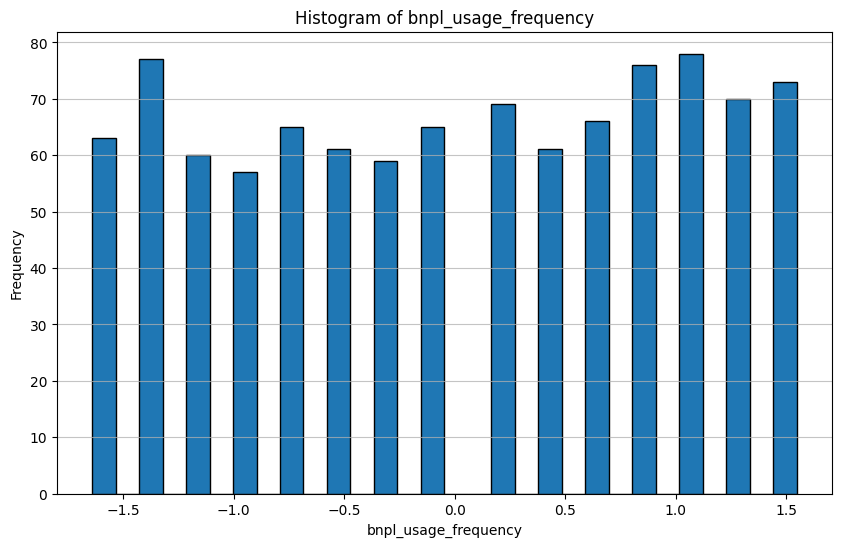

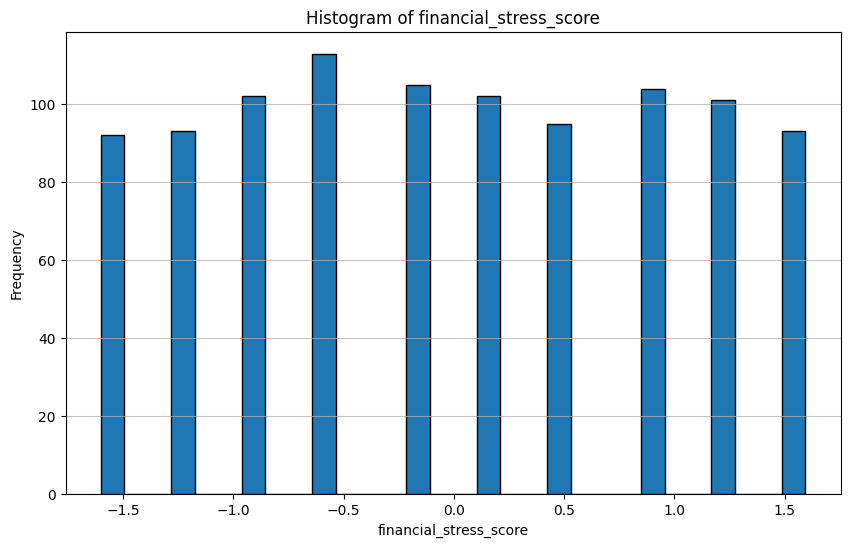

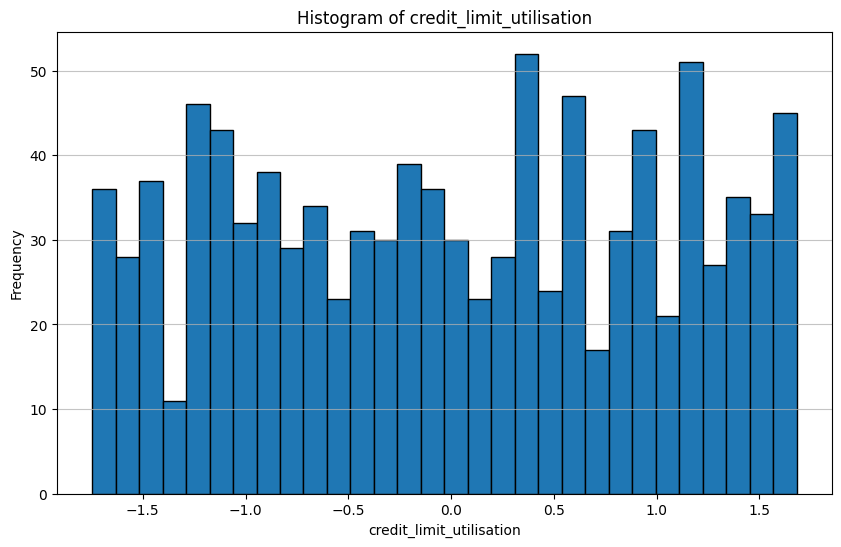

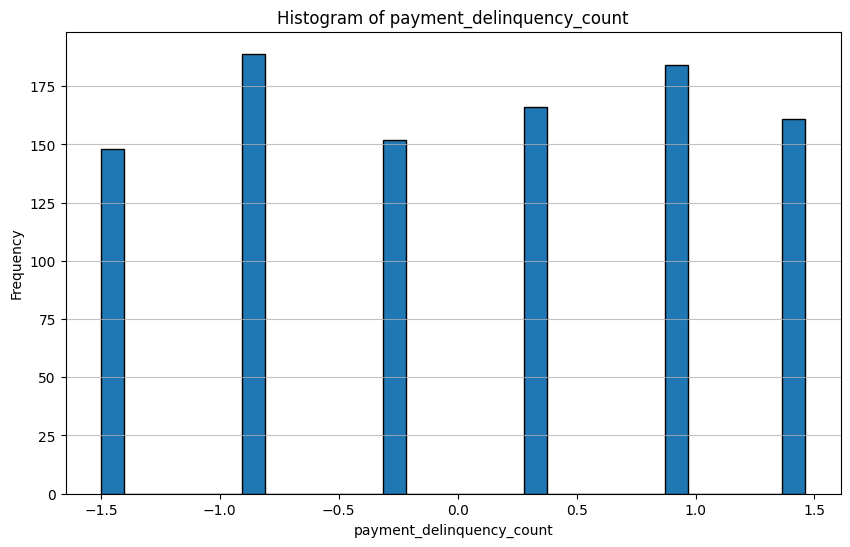

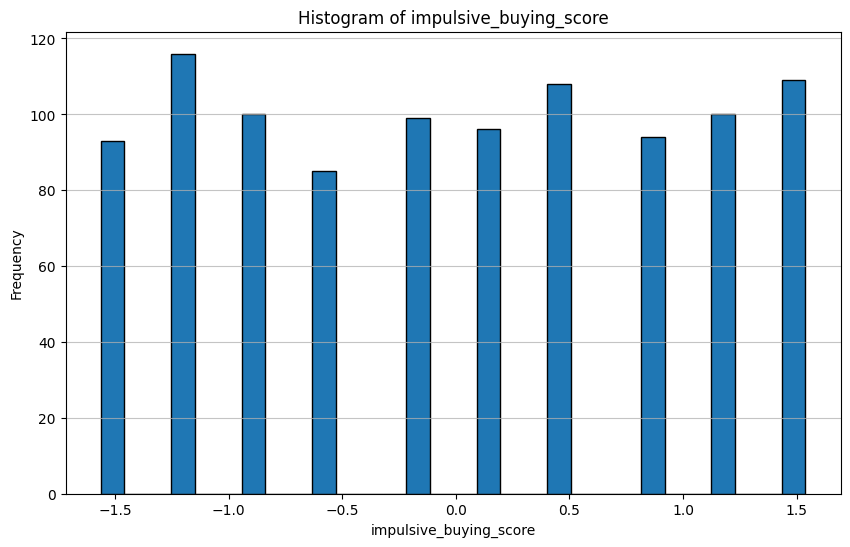

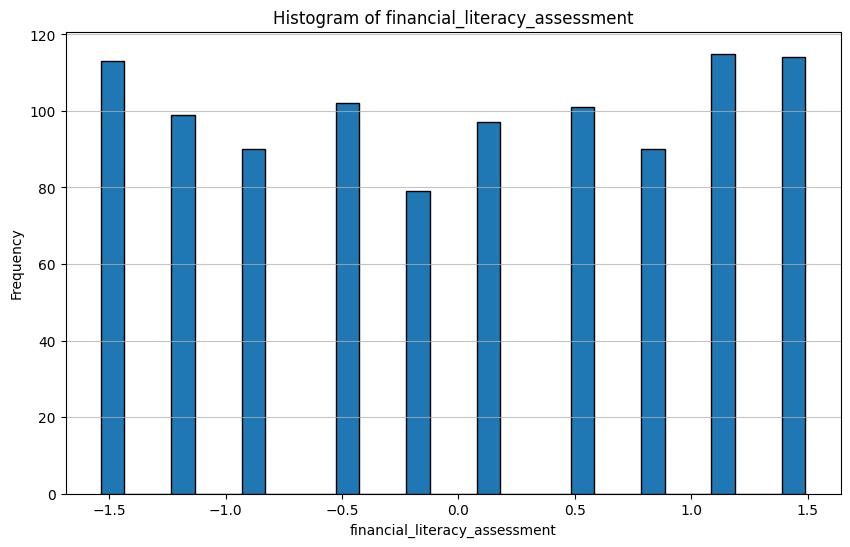

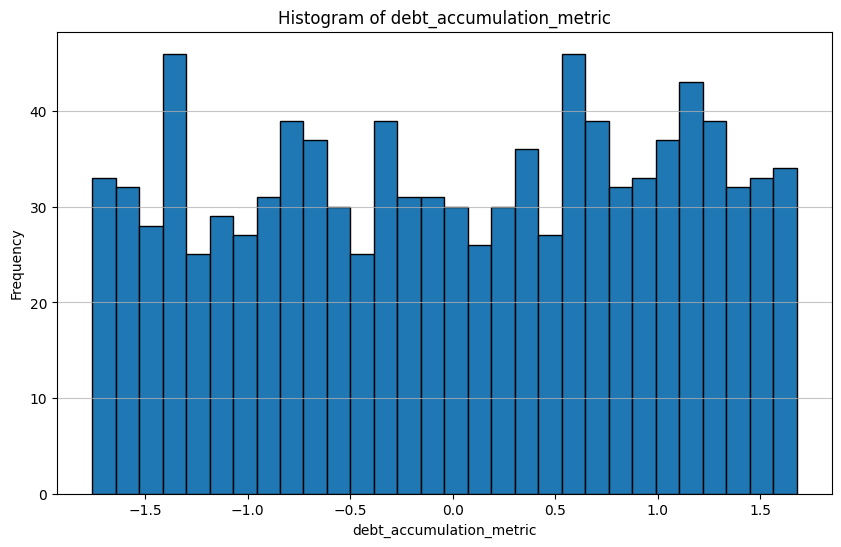

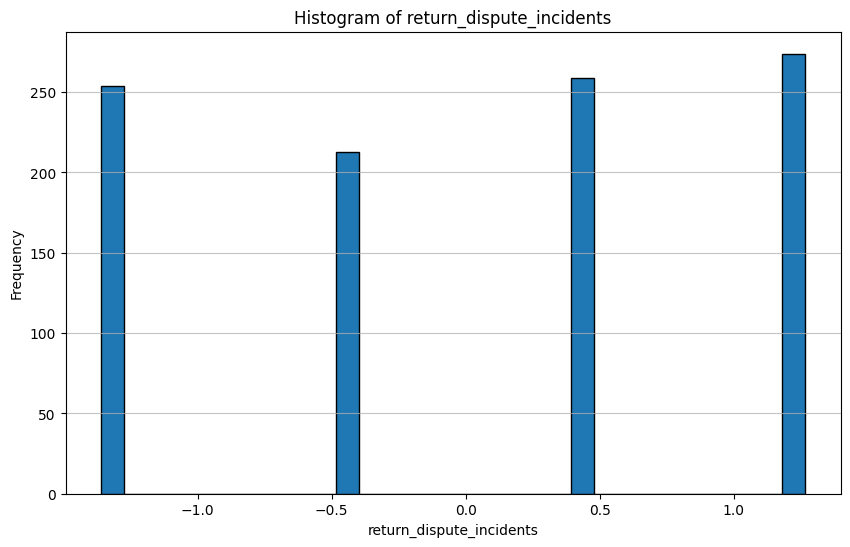

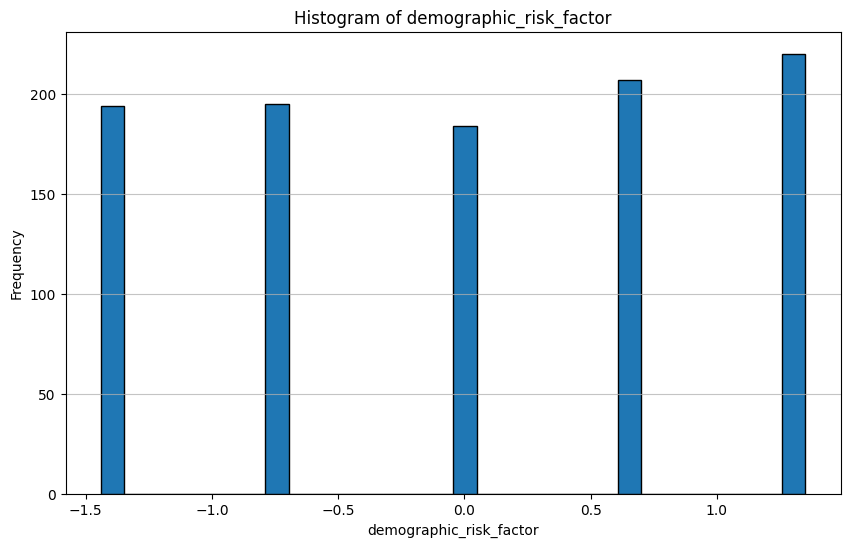

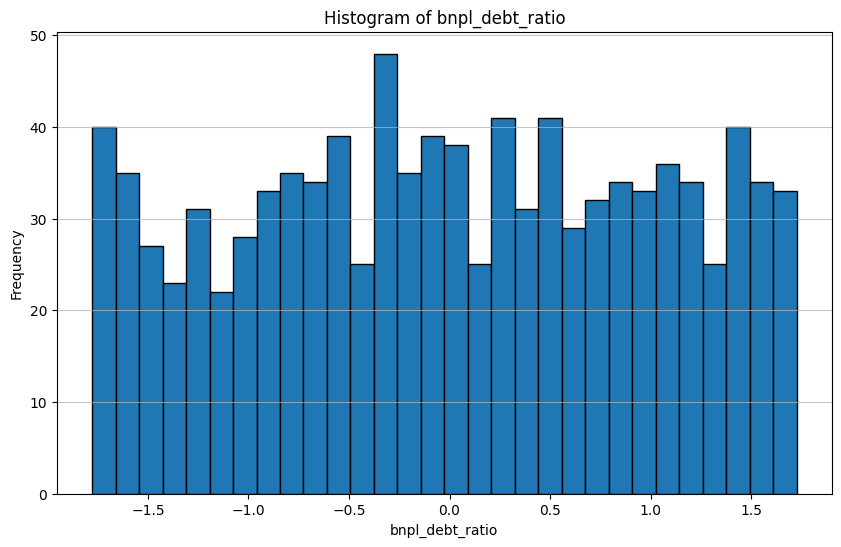

In [90]:
# run histograms for continuous columns
continuous_cols = continuous_col(data_scaled)
for column in continuous_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(data_scaled[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    #plt.savefig(f'C:\\Users\\ixz407\\OneDrive - University of Birmingham\\Dissertation\\Machine Learning\\Dissertation\\Plots\Histograms\\{column}_histogram.png')


In [91]:
#check for outliers in each column
for column in data_scaled.select_dtypes(include=['float64', 'int64']).columns:
    outliers = OutlierDetector(data_scaled[column])
    if not outliers.empty:
        print(f"Outliers in {column}:\n", outliers)
    else:
        print(f"No outliers detected in {column}.")

No outliers detected in failed_traditional_credit.
No outliers detected in over_indebtedness_flag.
No outliers detected in external_repayment_loans.
No outliers detected in credit_card_interest_incidence.
Outliers in default_flag:
 1      1
17     1
34     1
35     1
51     1
      ..
915    1
964    1
980    1
982    1
994    1
Name: default_flag, Length: 85, dtype: int64
No outliers detected in bnpl_usage_frequency.
No outliers detected in financial_stress_score.
No outliers detected in credit_limit_utilisation.
No outliers detected in payment_delinquency_count.
No outliers detected in impulsive_buying_score.
No outliers detected in financial_literacy_assessment.
No outliers detected in debt_accumulation_metric.
No outliers detected in return_dispute_incidents.
No outliers detected in demographic_risk_factor.
No outliers detected in bnpl_debt_ratio.


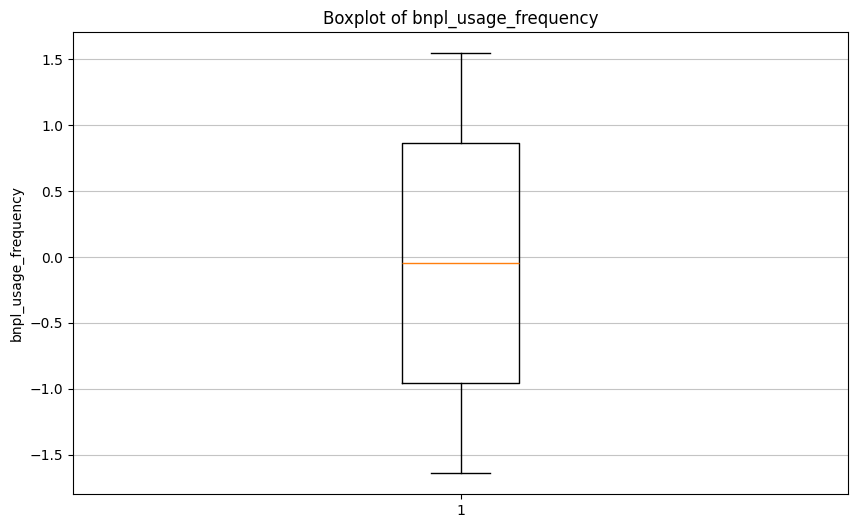

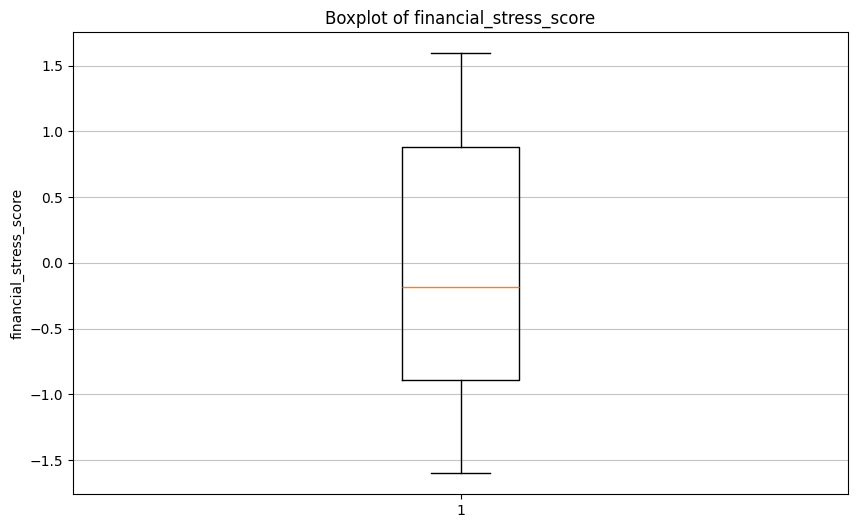

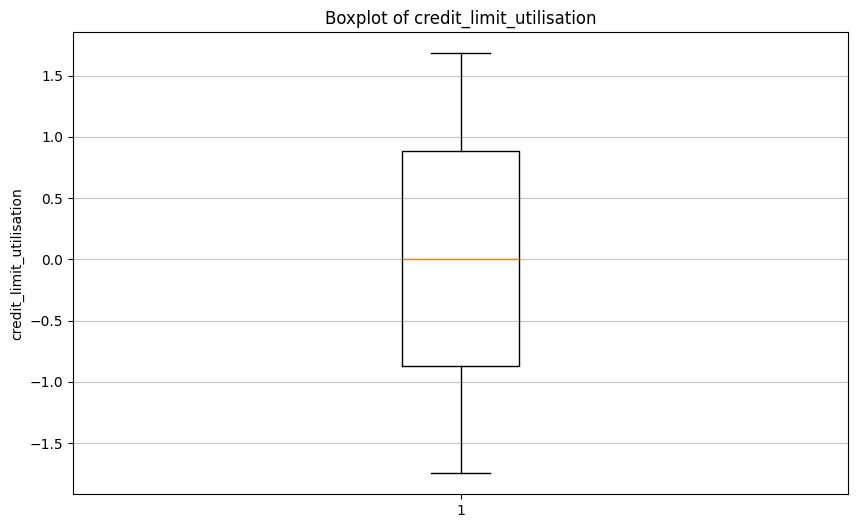

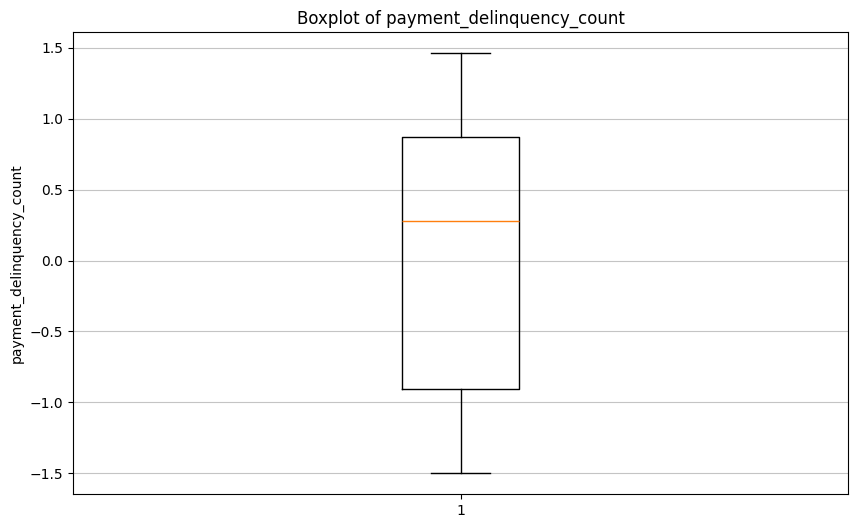

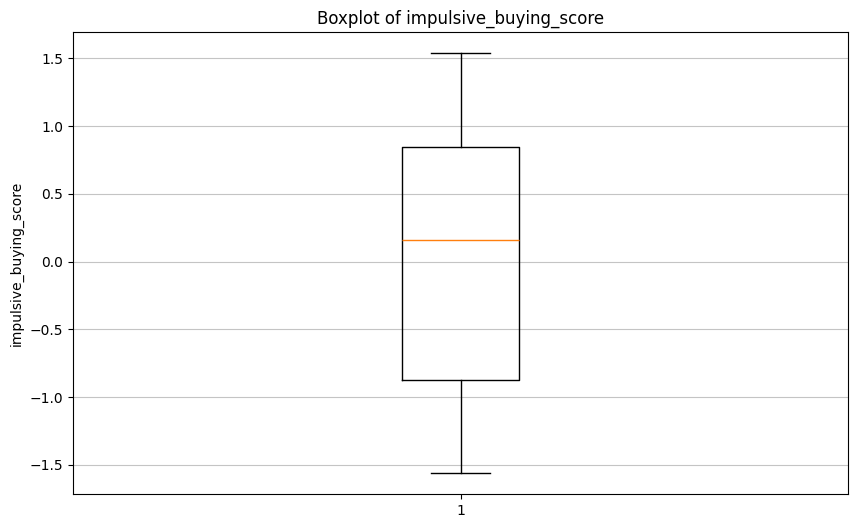

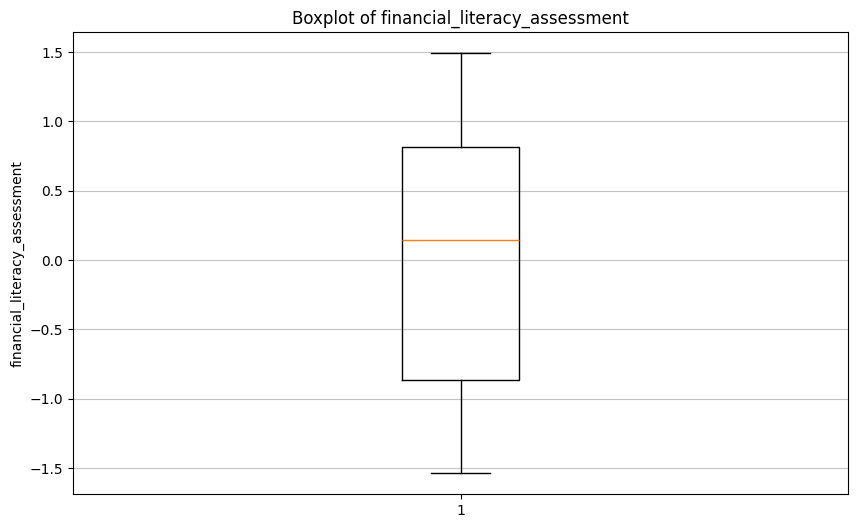

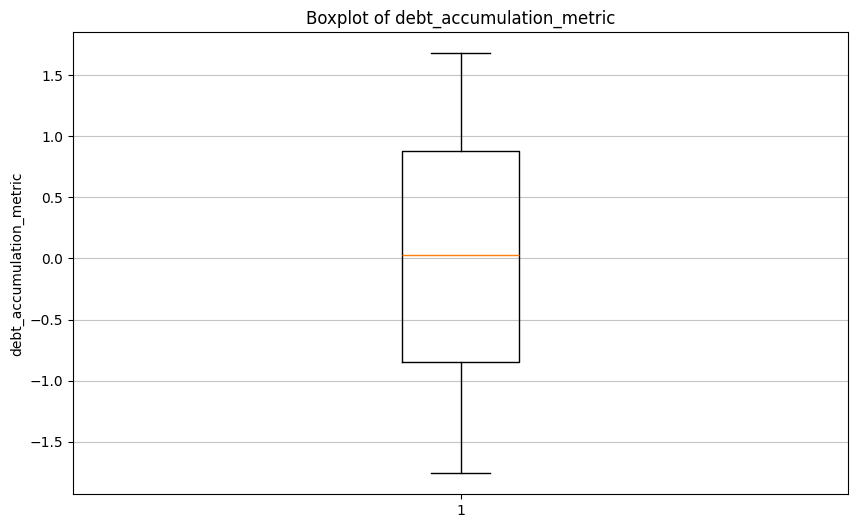

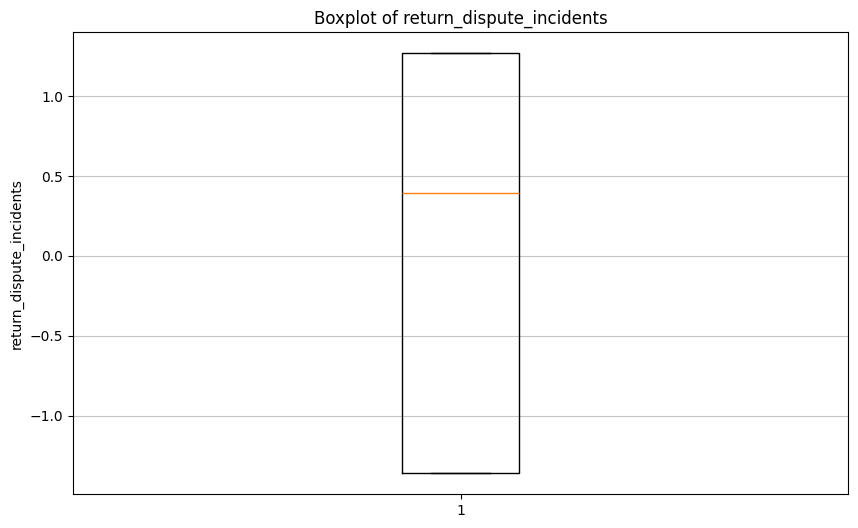

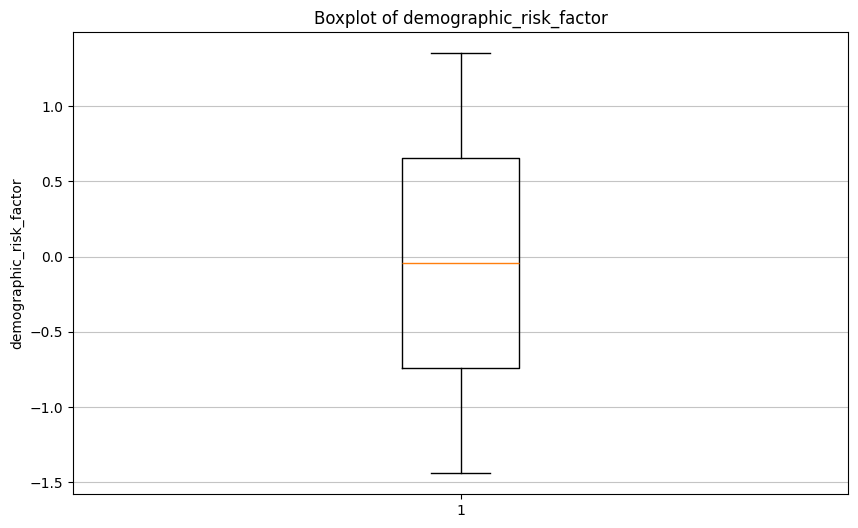

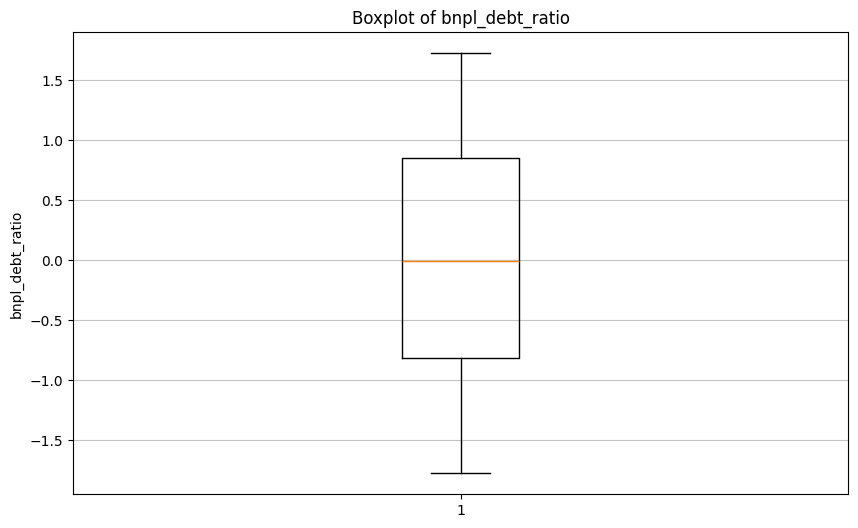

In [92]:
#print boxplots for continuous columns
for column in continuous_cols:
    plt.figure(figsize=(10, 6))
    plt.boxplot(data_scaled[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.grid(axis='y', alpha=0.75)
    #plt.savefig(f'C:\\Users\\ixz407\\OneDrive - University of Birmingham\\Dissertation\\Machine Learning\\Dissertation\\Plots\Boxplots\\{column}boxplots.png')

Balance of failed_traditional_credit:
 failed_traditional_credit
0    0.712
1    0.288
Name: proportion, dtype: float64
Balance of over_indebtedness_flag:
 over_indebtedness_flag
0    0.637
1    0.363
Name: proportion, dtype: float64
Balance of external_repayment_loans:
 external_repayment_loans
0    0.598
1    0.402
Name: proportion, dtype: float64
Balance of credit_card_interest_incidence:
 credit_card_interest_incidence
0    0.656
1    0.344
Name: proportion, dtype: float64
Balance of default_flag:
 default_flag
0    0.915
1    0.085
Name: proportion, dtype: float64


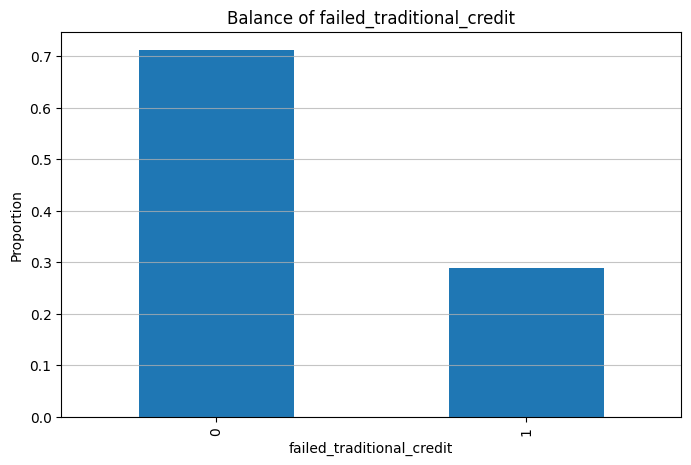

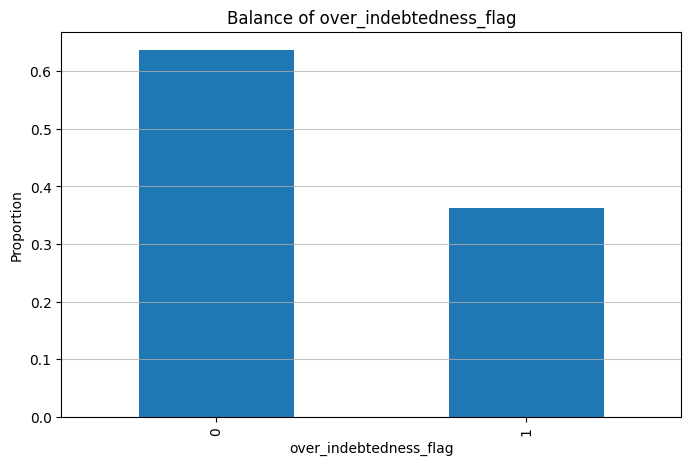

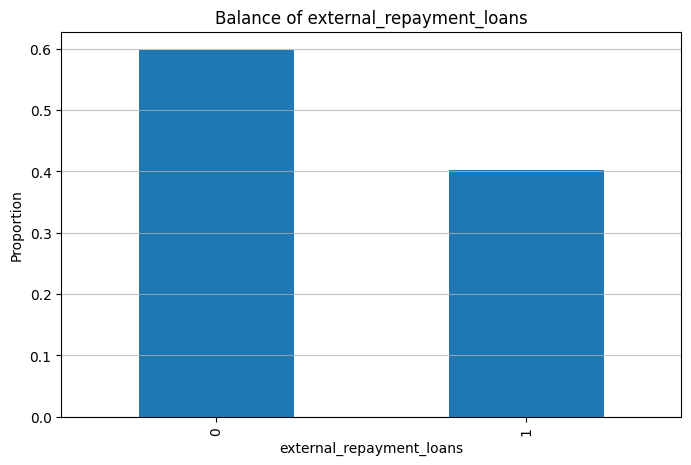

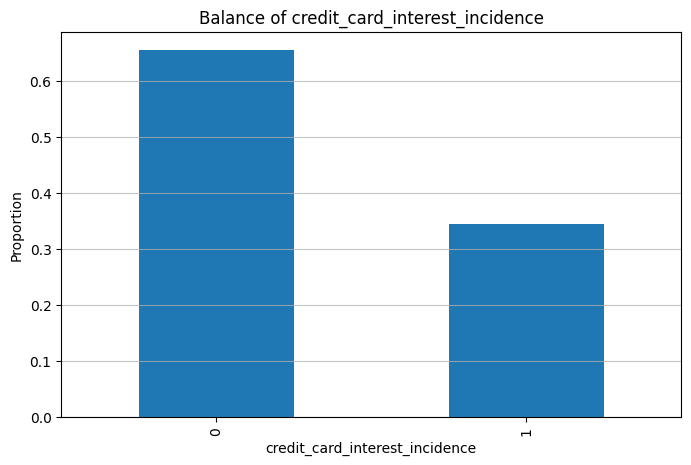

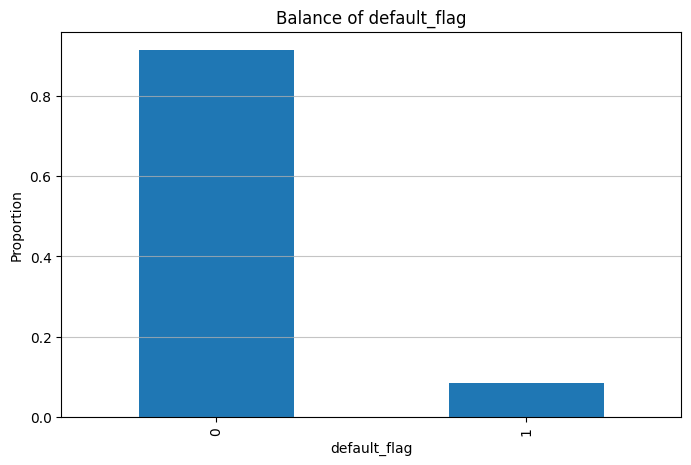

In [93]:
#check the balance of the binary columns
binary_cols = binary_col(data_scaled)
for column in binary_cols:
    balance = data_scaled[column].value_counts(normalize=True)
    print(f"Balance of {column}:\n", balance)
    plt.figure(figsize=(8, 5))
    balance.plot(kind='bar')
    plt.title(f'Balance of {column}')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.grid(axis='y', alpha=0.75)
    #plt.savefig(f'C:\\Users\\ixz407\\OneDrive - University of Birmingham\\Dissertation\\Machine Learning\\Dissertation\\Plots\Balances\\{column}balance.png')

([<matplotlib.axis.YTick at 0x29c1dcddd10>,
 [Text(0, 0, 'failed_traditional_credit'),
  Text(0, 1, 'over_indebtedness_flag'),
  Text(0, 2, 'external_repayment_loans'),
  Text(0, 3, 'credit_card_interest_incidence'),
  Text(0, 4, 'default_flag'),
  Text(0, 5, 'bnpl_usage_frequency'),
  Text(0, 6, 'financial_stress_score'),
  Text(0, 7, 'credit_limit_utilisation'),
  Text(0, 8, 'payment_delinquency_count'),
  Text(0, 9, 'impulsive_buying_score'),
  Text(0, 10, 'financial_literacy_assessment'),
  Text(0, 11, 'debt_accumulation_metric'),
  Text(0, 12, 'return_dispute_incidents'),
  Text(0, 13, 'demographic_risk_factor'),
  Text(0, 14, 'bnpl_debt_ratio')])

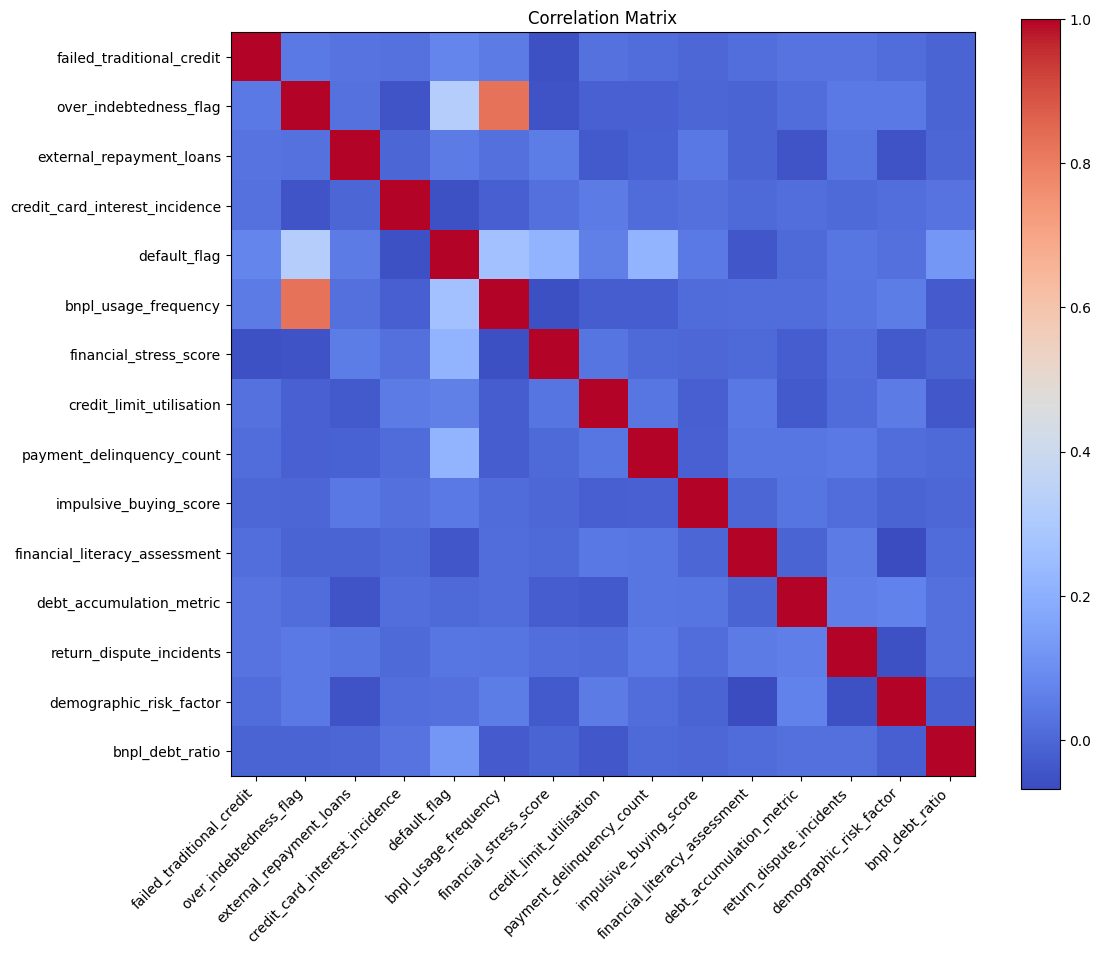

In [94]:
#get the correlation matrix
correlation_matrix = data_scaled.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix')
#change the x and y ticks to the column names
plt.xticks(ticks=np.arange(len(data_scaled.columns)), labels=data_scaled.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(data_scaled.columns)), labels=data_scaled.columns)
#plt.savefig(f'C:\\Users\\ixz407\\OneDrive - University of Birmingham\\Dissertation\\Machine Learning\\Dissertation\\Plots\correlation_matrix.png')

In [104]:
#print the correlation value between BNPL usage frequency and over-indebtedness
correlation_value = correlation_matrix.loc['bnpl_usage_frequency', 'over_indebtedness_flag']
print(f"Correlation between BNPL usage frequency and over-indebtedness: {correlation_value}")

Correlation between BNPL usage frequency and over-indebtedness: 0.8276764247357605


In [95]:
# Initialize an empty list to store outlier indices
outlier_indices = []

# Check for outliers in the scaled data by splitting the data into two parts: one with default_flag = 0 and one with default_flag = 1
data_default_0 = data_scaled[data_scaled['default_flag'] == 0]
data_default_1 = data_scaled[data_scaled['default_flag'] == 1]

for column in continuous_cols:
    outliers_0 = OutlierDetector(data_default_0[column])
    outliers_1 = OutlierDetector(data_default_1[column])
    
    # Add indices of outliers to the list
    outlier_indices.extend(outliers_0.index.tolist())
    outlier_indices.extend(outliers_1.index.tolist())
    
    if not outliers_0.empty:
        print(f"Outliers in {column} for default_flag = 0:\n", outliers_0)
    else:
        print(f"No outliers detected in {column} for default_flag = 0.")
    
    if not outliers_1.empty:
        print(f"Outliers in {column} for default_flag = 1:\n", outliers_1)
    else:
        print(f"No outliers detected in {column} for default_flag = 1.")

# Print the list of outlier indices
print("Outlier indices:", outlier_indices)

No outliers detected in bnpl_usage_frequency for default_flag = 0.
Outliers in bnpl_usage_frequency for default_flag = 1:
 51    -1.413380
324   -1.641088
390   -1.413380
409   -0.957965
424   -0.957965
616   -0.730258
Name: bnpl_usage_frequency, dtype: float64
No outliers detected in financial_stress_score for default_flag = 0.
No outliers detected in financial_stress_score for default_flag = 1.
No outliers detected in credit_limit_utilisation for default_flag = 0.
No outliers detected in credit_limit_utilisation for default_flag = 1.
No outliers detected in payment_delinquency_count for default_flag = 0.
Outliers in payment_delinquency_count for default_flag = 1:
 324   -1.500097
365   -1.500097
Name: payment_delinquency_count, dtype: float64
No outliers detected in impulsive_buying_score for default_flag = 0.
No outliers detected in impulsive_buying_score for default_flag = 1.
No outliers detected in financial_literacy_assessment for default_flag = 0.
No outliers detected in financi

In [96]:
#print the number of total outliers detected
outlier_indices.__len__()

8

In [97]:
#drop the outliers from the data_scaled dataframe
data_scaled_cleaned = data_scaled.drop(index=outlier_indices)

In [102]:
data_scaled_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   failed_traditional_credit       993 non-null    int64  
 1   external_repayment_loans        993 non-null    int64  
 2   credit_card_interest_incidence  993 non-null    int64  
 3   default_flag                    993 non-null    int64  
 4   bnpl_usage_frequency            993 non-null    float64
 5   financial_stress_score          993 non-null    float64
 6   credit_limit_utilisation        993 non-null    float64
 7   payment_delinquency_count       993 non-null    float64
 8   impulsive_buying_score          993 non-null    float64
 9   financial_literacy_assessment   993 non-null    float64
 10  debt_accumulation_metric        993 non-null    float64
 11  return_dispute_incidents        993 non-null    float64
 12  demographic_risk_factor         993 non-n

<Figure size 1000x600 with 0 Axes>

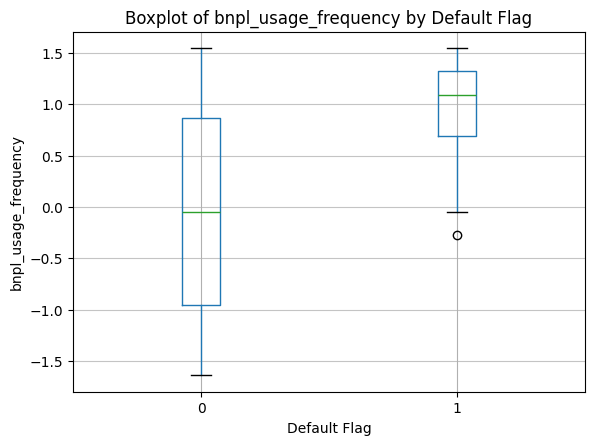

<Figure size 1000x600 with 0 Axes>

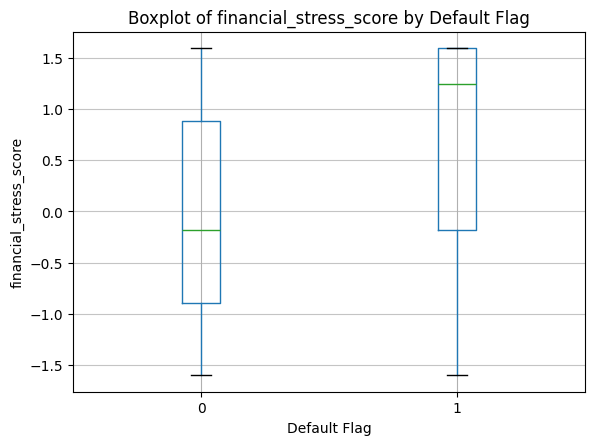

<Figure size 1000x600 with 0 Axes>

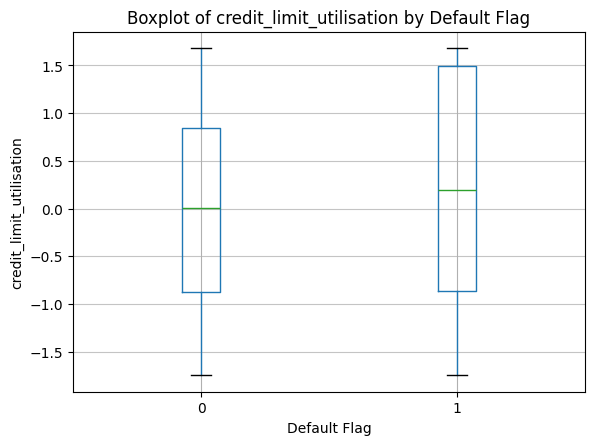

<Figure size 1000x600 with 0 Axes>

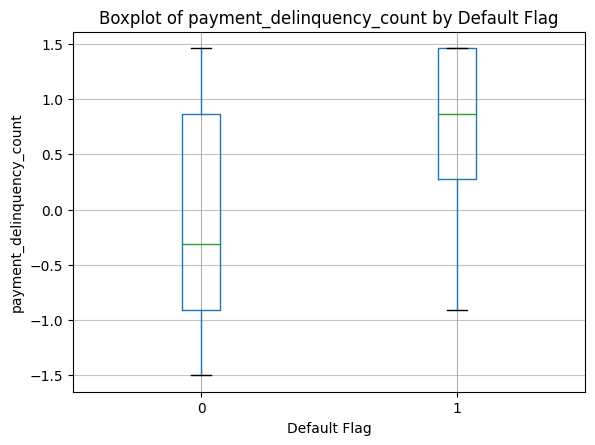

<Figure size 1000x600 with 0 Axes>

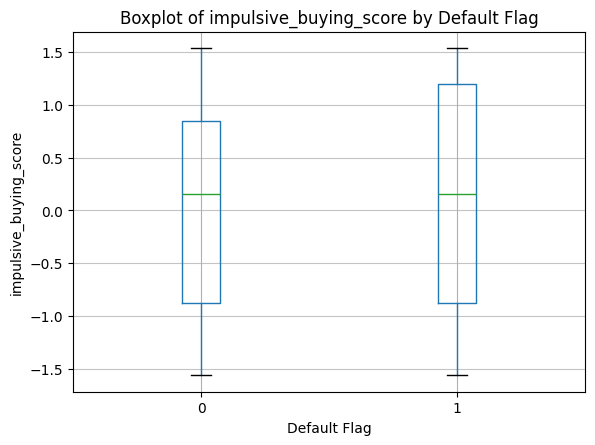

<Figure size 1000x600 with 0 Axes>

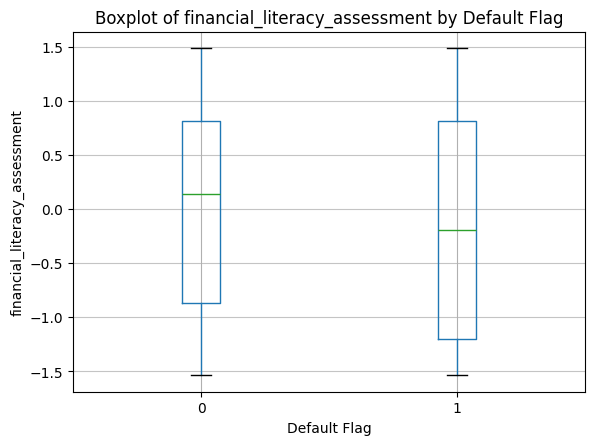

<Figure size 1000x600 with 0 Axes>

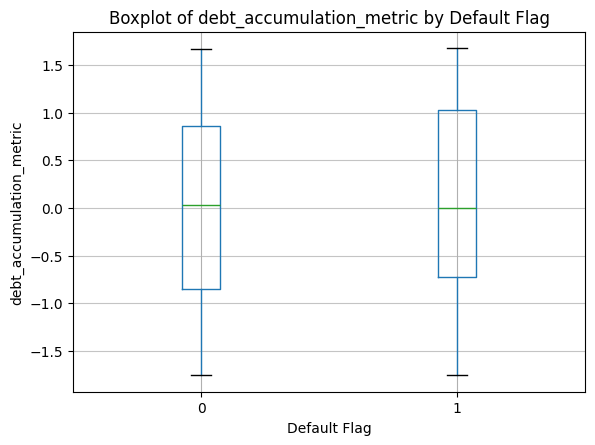

<Figure size 1000x600 with 0 Axes>

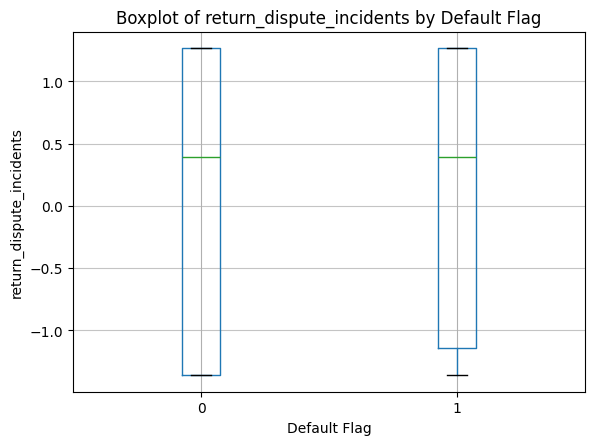

<Figure size 1000x600 with 0 Axes>

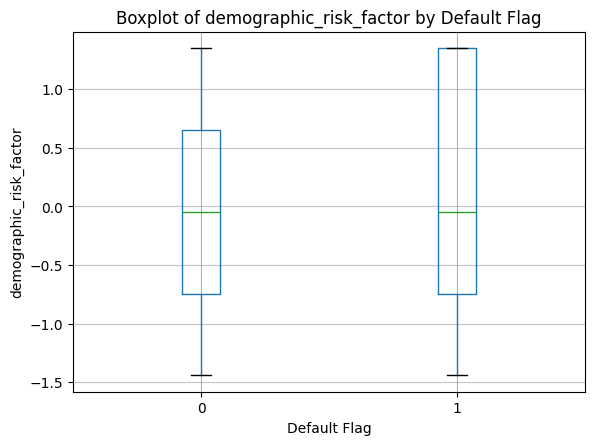

<Figure size 1000x600 with 0 Axes>

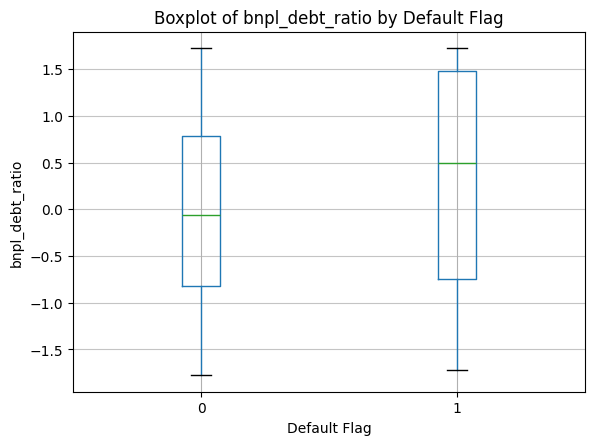

In [98]:
#plot 2 boxplots for each column one with default flag 0 and one with default flag 1
continuous_cols = continuous_col(data_scaled_cleaned)
for column in continuous_cols:
    plt.figure(figsize=(10, 6))
    data_scaled_cleaned.boxplot(column=column, by='default_flag')
    plt.title(f'Boxplot of {column} by Default Flag')
    plt.suptitle('')
    plt.xlabel('Default Flag')
    plt.ylabel(column)
    plt.grid(axis='y', alpha=0.75)
    #plt.savefig(f'C:\\Users\\ixz407\\OneDrive - University of Birmingham\\Dissertation\\Machine Learning\\Dissertation\\Plots\Boxplots\\{column}_boxplot_by_default_flag.png')

Correlation between 'bnpl_usage_frequency' and 'over_indebtedness_flag': 0.8275


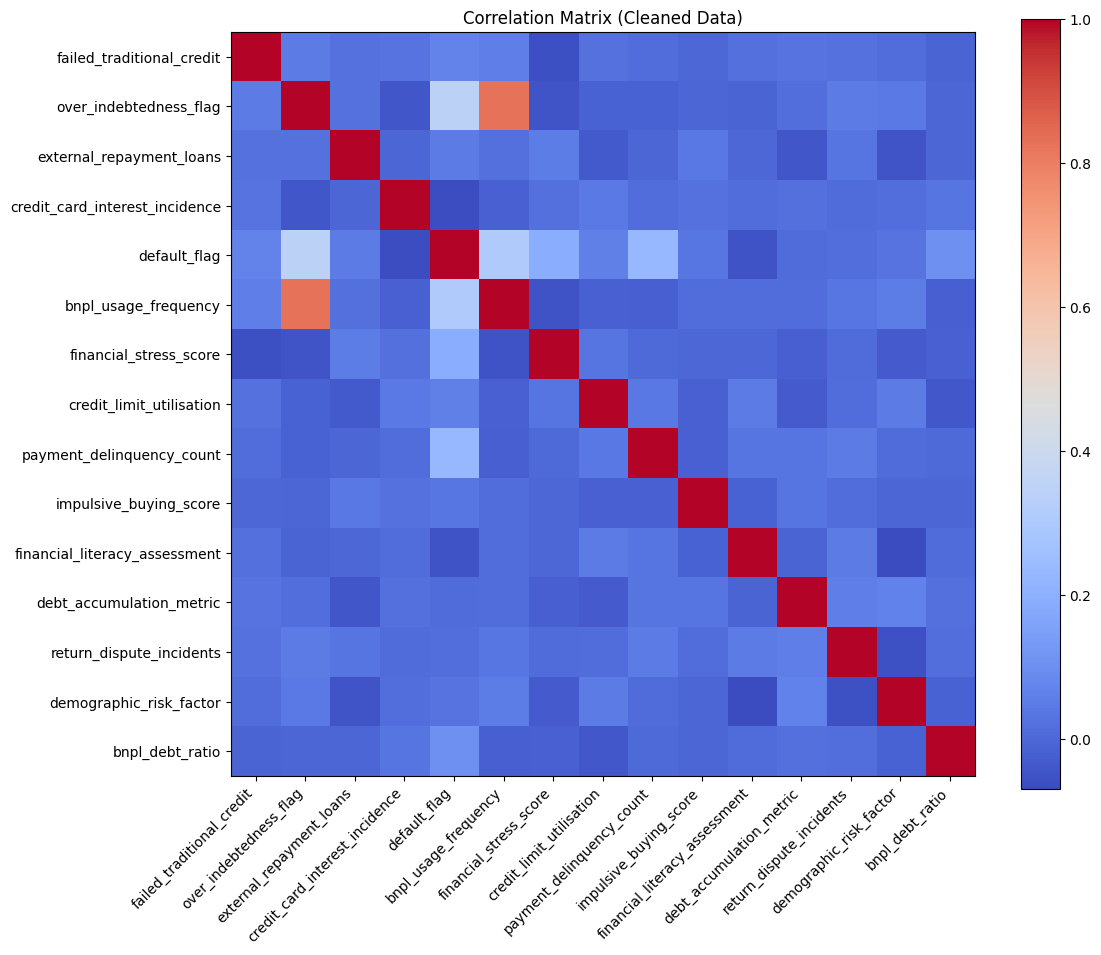

In [99]:
#plot the correlation matrix again after removing outliers
correlation_matrix_cleaned = data_scaled_cleaned.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix_cleaned, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix (Cleaned Data)')
#change the x and y ticks to the column names
plt.xticks(ticks=np.arange(len(data_scaled_cleaned.columns)), labels=data_scaled_cleaned.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(data_scaled_cleaned.columns)), labels=data_scaled_cleaned.columns)
#plt.savefig('C:\\Users\\ixz407\\OneDrive - University of Birmingham\\Dissertation\\Machine Learning\\Dissertation\\Plots\correlation_matrix_cleaned.png')

#what is the numerical value of the corr of 'bnpl_usage_frequency' and 'over_indebtedness_flag'
corr_value = correlation_matrix_cleaned.loc['bnpl_usage_frequency', 'over_indebtedness_flag']
print(f"Correlation between 'bnpl_usage_frequency' and 'over_indebtedness_flag': {corr_value:.4f}")


In [100]:
#drop the over_indebtedness_flag column from the data_scaled_cleaned dataframe
data_scaled_cleaned = data_scaled_cleaned.drop(columns=['over_indebtedness_flag'])
binary_cols = [col for col in binary_cols if col != 'over_indebtedness_flag']
#data_scaled_cleaned.to_csv(r'C:\Users\ixz407\OneDrive - University of Birmingham\Dissertation\Machine Learning\Dissertation\Tables\bnpl_scaled_cleaned.csv', index=False)


Balance of failed_traditional_credit after cleaning:
 failed_traditional_credit
0    0.712991
1    0.287009
Name: proportion, dtype: float64


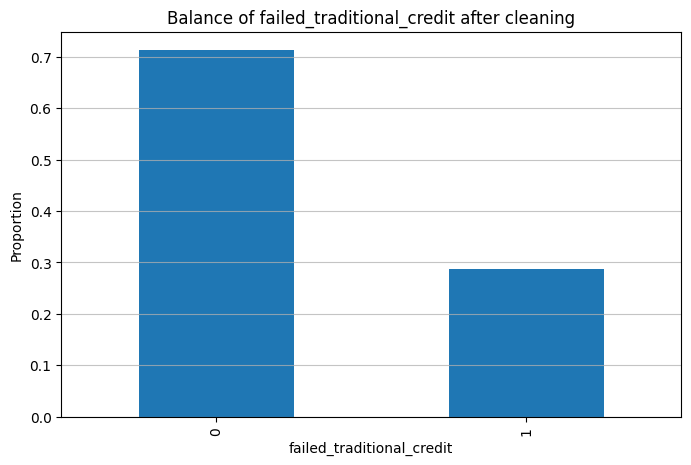

Balance of external_repayment_loans after cleaning:
 external_repayment_loans
0    0.598187
1    0.401813
Name: proportion, dtype: float64


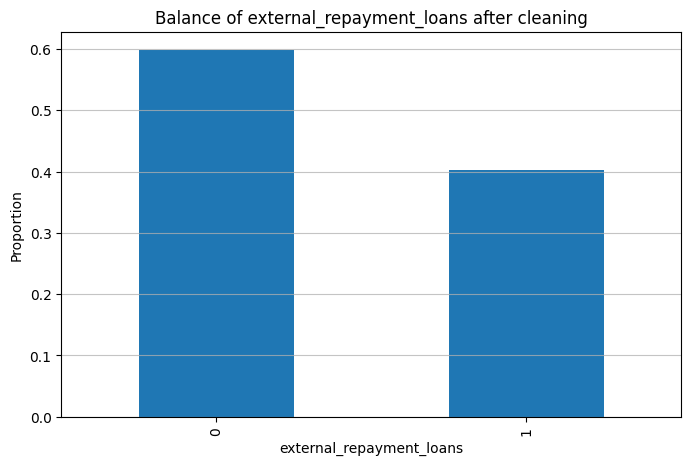

Balance of credit_card_interest_incidence after cleaning:
 credit_card_interest_incidence
0    0.656596
1    0.343404
Name: proportion, dtype: float64


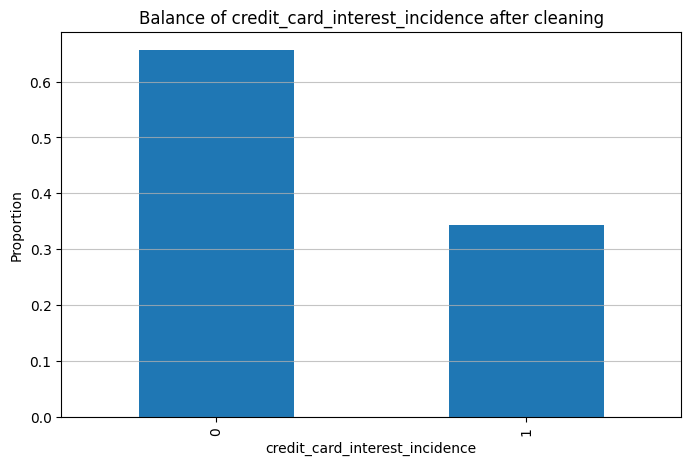

Balance of default_flag after cleaning:
 default_flag
0    0.92145
1    0.07855
Name: proportion, dtype: float64


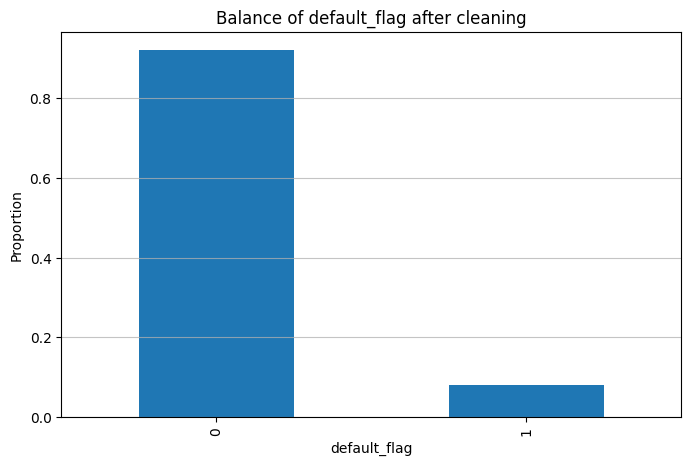

In [101]:
#check the balance of the binary columns again after removing outliers
binary_cols = binary_col(data_scaled_cleaned)
for column in binary_cols:
    balance = data_scaled_cleaned[column].value_counts(normalize=True)
    print(f"Balance of {column} after cleaning:\n", balance)
    plt.figure(figsize=(8, 5))
    balance.plot(kind='bar')
    plt.title(f'Balance of {column} after cleaning')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

Feature Engineering


In [ ]:
data_scaled_cleaned

In [ ]:
# concat the following stress_usage_interaction = financial_stress_score × bnpl_usage_frequency
data_scaled_cleaned['stress_usage_interaction'] = (
    data_scaled_cleaned['financial_stress_score'] * data_scaled_cleaned['bnpl_usage_frequency']
)

#adjusted_debt_interaction = bnpl_debt_ratio + financial_stress_score
data_scaled_cleaned['adjusted_debt_interaction'] = (
    data_scaled_cleaned['bnpl_debt_ratio'] * data_scaled_cleaned['financial_stress_score']
)
#data_scaled_cleaned.to_csv(r'C:\Users\ixz407\OneDrive - University of Birmingham\Dissertation\Machine Learning\Dissertation\Tables\bnpl_scaled_cleaned_interactions.csv', index=False)


In [ ]:
#get the mean and std of the new columns
new_columns = [
    'stress_usage_interaction',
    'adjusted_debt_interaction'
]
mean_std = data_scaled_cleaned[new_columns].agg(['mean', 'std'])
print("Mean and Standard Deviation of New Columns:")
print(mean_std)


In [ ]:
# Initialize an empty list to store outlier indices for new columns
new_outlier_indices = []
for column in new_columns:
    outliers = OutlierDetector(data_scaled_cleaned[column])
    new_outlier_indices.extend(outliers.index.tolist())
    if not outliers.empty:
        print(f"Outliers in {column}:\n", outliers)
    else:
        print(f"No outliers detected in {column}.")

# Print the list of outlier indices
print("New outlier indices:", new_outlier_indices)

In [ ]:
# remove any duplicate outlier indices and sort them
new_outlier_indices = sorted(set(new_outlier_indices))
print("Unique sorted new outlier indices:", new_outlier_indices)
len(new_outlier_indices)


In [ ]:
#plot the box plots for the new columns
for column in new_columns:
    plt.figure(figsize=(10, 6))
    data_scaled_cleaned.boxplot(column=column, by='default_flag')
    plt.title(f'Boxplot of {column} by Default Flag')
    plt.suptitle('')
    plt.xlabel('Default Flag')
    plt.ylabel(column)
    plt.grid(axis='y', alpha=0.75)
    #plt.savefig(f'C:\\Users\\ixz407\\OneDrive - University of Birmingham\\Dissertation\\Machine Learning\\Dissertation\\Plots\Boxplots\\{column}_boxplot_by_default_flag.png')

In [ ]:

results = []
for feat in new_columns:
    r, p = pointbiserialr(data_scaled_cleaned[feat], data_scaled_cleaned['default_flag'])
    results.append({'feature': feat, 'r': r, 'p_value': p})

corr_df = pd.DataFrame(results).sort_values('r', key=abs, ascending=False)
print(corr_df)
# save the data-s

In [ ]:
#plot a new correlation matrix with the new columns
correlation_matrix_new = data_scaled_cleaned.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix_new, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix with New Columns')
#change the x and y ticks to the column names
plt.xticks(ticks=np.arange(len(data_scaled_cleaned.columns)), labels=data_scaled_cleaned.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(data_scaled_cleaned.columns)), labels=data_scaled_cleaned.columns)
plt.show()
#plt.savefig('C:\\Users\\ixz407\\OneDrive - University of Birmingham\\Dissertation\\Machine Learning\\Dissertation\\Plots\correlation_matrix_new.png')

Day 6

In [ ]:
final_data = pd.read_csv(r'C:\Users\ixz407\OneDrive - University of Birmingham\Dissertation\Machine Learning\Dissertation\Tables\bnpl_scaled_cleaned_interactions.csv')

# 1) split off test set
train_val, test = train_test_split(
    final_data,
    test_size=0.20,
    stratify=final_data['default_flag'],
    random_state=42
)


In [ ]:

# 2) split train vs. validation from the remaining 80%
train, val = train_test_split(
    train_val,
    test_size=0.25,                       # 0.25 × 80% → 20% overall
    stratify=train_val['default_flag'],
    random_state=42
)


In [ ]:

print("Default rates:",
      train['default_flag'].mean(),
      val['default_flag'].mean(),
      test['default_flag'].mean())


In [ ]:
train_idx = train.index.to_list()
val_idx   = val.index.to_list()
test_idx  = test.index.to_list()
#print the indices and the number of indices in each set
print(f"Train indices: {train_idx[:10]}... ({len(train_idx)} total)")
print(f"Validation indices: {val_idx[:10]}... ({len(val_idx)} total)")
print(f"Test indices: {test_idx[:10]}... ({len(test_idx)} total)")


In [ ]:
#create 3 csv files for train, val and test sets
train.to_csv(r'C:\Users\ixz407\OneDrive - University of Birmingham\Dissertation\Machine Learning\Dissertation\Tables\bnpl_train.csv', index=False)
val.to_csv(r'C:\Users\ixz407\OneDrive - University of Birmingham\Dissertation\Machine Learning\Dissertation\Tables\bnpl_val.csv', index=False)
test.to_csv(r'C:\Users\ixz407\OneDrive - University of Birmingham\Dissertation\Machine Learning\Dissertation\Tables\bnpl_test.csv', index=False)
# Print the shape of each set
print(f"Train set shape: {train.shape}")
print(f"Validation set shape: {val.shape}")
print(f"Test set shape: {test.shape}")